<a href="https://colab.research.google.com/github/riponalmamun/Arsenic-Dataset-/blob/main/WITHOUT_ROC_CURVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from scipy.stats import  t, ttest_ind, ttest_rel
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

🧾 Classes found: ['infacted', 'not_infacted']

📊 Image count per class:
  infacted: 741 images
  not_infacted: 546 images


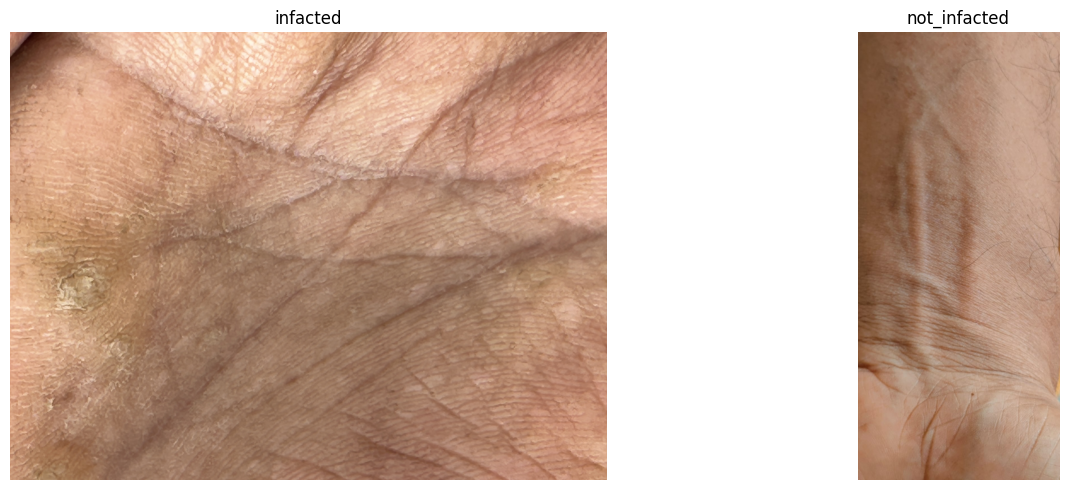

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set dataset directory
data_dir ='/content/drive/MyDrive/capstone/ArsenicSkinImageBD/Original'

# List class folders
classes = sorted(os.listdir(data_dir))
print("🧾 Classes found:", classes)

# Count images per class
class_counts = {}
for cls in classes:
    cls_path = os.path.join(data_dir, cls)
    if os.path.isdir(cls_path):
        count = len([f for f in os.listdir(cls_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        class_counts[cls] = count

print("\n📊 Image count per class:")
for cls, count in class_counts.items():
    print(f"  {cls}: {count} images")

# Show a sample image from each class
fig, axes = plt.subplots(1, len(classes), figsize=(15, 5))
for i, cls in enumerate(classes):
    cls_path = os.path.join(data_dir, cls)
    img_files = [f for f in os.listdir(cls_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if img_files:
        img = mpimg.imread(os.path.join(cls_path, img_files[0]))
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(cls)

plt.tight_layout()
plt.show()

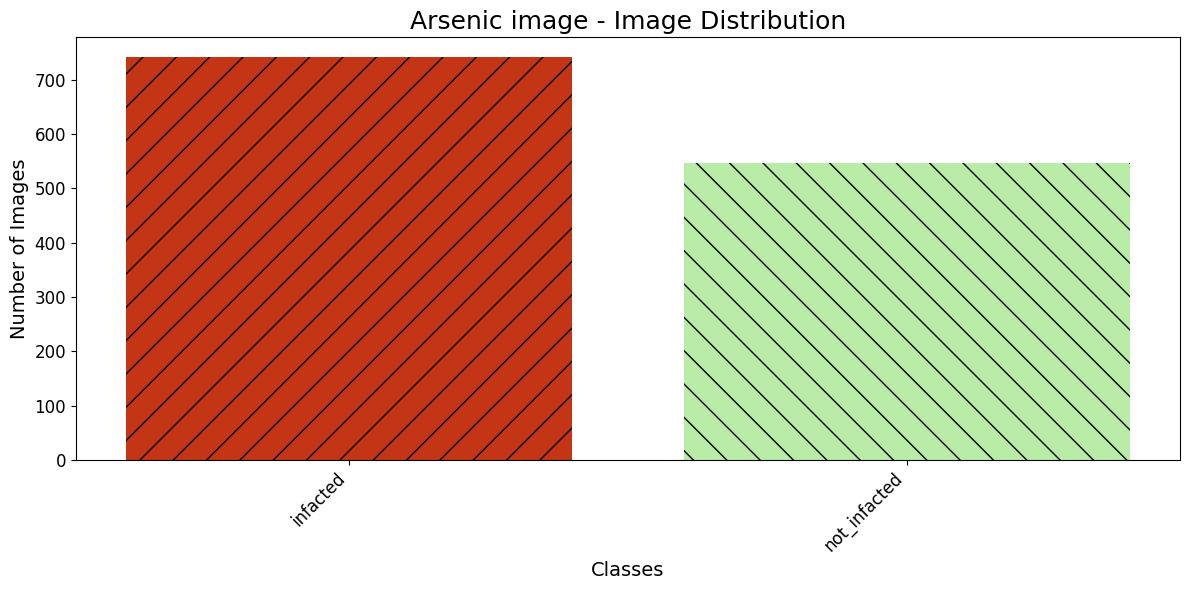


📊 Total images: 1287
📂 Image count per class:

       Class  Number of Images
    infacted               741
not_infacted               546


In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import random
from collections import defaultdict

# Define dataset path
dataset_path ='/content/drive/MyDrive/capstone/ArsenicSkinImageBD/Original'
   # ✅ Adjust if needed

# Count images per class
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')
class_counts = defaultdict(int)
total_images = 0

for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)
    if os.path.isdir(class_path):
        image_files = [
            f for f in os.listdir(class_path)
            if f.lower().endswith(image_extensions)
        ]
        count = len(image_files)
        class_counts[class_folder] = count
        total_images += count

# Prepare data for plotting
categories = sorted(class_counts.keys())
image_counts = [class_counts[cls] for cls in categories]

# Plotting
plt.figure(figsize=(12, 6))
patterns = ["/", "\\", "|", "-", "+", "x", "o", "*"] * (len(categories) // 8 + 1)
colors = ["#" + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in categories]
bars = plt.bar(categories, image_counts, color=colors)

for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

plt.title("Arsenic image - Image Distribution", fontsize=18)
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Number of Images", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the plot
save_path = os.path.join(dataset_path, "Arsenic_Image_Distribution.png")
plt.savefig(save_path, format="png", dpi=600)
plt.show()

# Table output
df = pd.DataFrame({"Class": categories, "Number of Images": image_counts})
print(f"\n📊 Total images: {total_images}")
print("📂 Image count per class:\n")
print(df.to_string(index=False))

In [ ]:
import shutil
import os
import random

# Define dataset source path
dataset_source = '/content/drive/MyDrive/capstone/ArsenicSkinImageBD/Original'

# Define target paths for train, validation, and test sets
train_path = "/content/drive/MyDrive/capstone/ArsenicSkinImageBD/Original/train"
val_path = "/content/drive/MyDrive/capstone/ArsenicSkinImageBD/Original/val"
test_path ="/content/drive/MyDrive/capstone/ArsenicSkinImageBD/Original/test"

# Create directories for train, validation, and test sets if they don't exist
for path in [train_path, val_path, test_path]:
    os.makedirs(path, exist_ok=True)

# Define the split ratios for train, validation, and test
split_ratios = {"train": 0.8, "val": 0.05, "test": 0.15}

# Iterate through each class folder (assuming class-wise folder structure in the dataset)
for class_folder in os.listdir(dataset_source):
    class_path = os.path.join(dataset_source, class_folder)

    # Process only directories (class folders)
    if os.path.isdir(class_path):
        # List only image files within the class folder
        images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

        # Shuffle the image filenames to randomize the split
        random.shuffle(images)

        # Calculate the number of images for each split
        train_split = int(len(images) * split_ratios["train"])
        val_split = int(len(images) * split_ratios["val"])
        test_split = len(images) - train_split - val_split

        # Split and copy images into respective directories
        for i, img in enumerate(images):
            src_img_path = os.path.join(class_path, img)

            # Determine the target folder based on the split
            if i < train_split:
                dest_folder = os.path.join(train_path, class_folder)
            elif i < train_split + val_split:
                dest_folder = os.path.join(val_path, class_folder)
            else:
                dest_folder = os.path.join(test_path, class_folder)

            # Ensure the target folder exists
            os.makedirs(dest_folder, exist_ok=True)

            # Define the full path for the destination image (with the image name included)
            dest_img_path = os.path.join(dest_folder, img)

            # Copy the image to the appropriate folder
            shutil.copy(src_img_path, dest_img_path)

print("✅ Dataset successfully split into train/val/test (80%/5%/15%)!")


✅ Dataset successfully split into train/val/test (80%/5%/15%)!


DENSE NET

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 156MB/s]


Epoch 1/25
----------
Train Loss: 0.4674 Train Acc: 0.7772
Val   Loss: 0.2448 Val   Acc: 0.8906
Epoch 2/25
----------
Train Loss: 0.1677 Train Acc: 0.9397
Val   Loss: 0.0886 Val   Acc: 0.9844
Epoch 3/25
----------
Train Loss: 0.0796 Train Acc: 0.9757
Val   Loss: 0.0516 Val   Acc: 0.9688
Epoch 4/25
----------
Train Loss: 0.0399 Train Acc: 0.9951
Val   Loss: 0.0369 Val   Acc: 1.0000
Epoch 5/25
----------
Train Loss: 0.0462 Train Acc: 0.9893
Val   Loss: 0.0612 Val   Acc: 0.9688
Epoch 6/25
----------
Train Loss: 0.0282 Train Acc: 0.9961
Val   Loss: 0.0329 Val   Acc: 0.9844
Epoch 7/25
----------
Train Loss: 0.0182 Train Acc: 0.9971
Val   Loss: 0.0180 Val   Acc: 1.0000
Epoch 8/25
----------
Train Loss: 0.0243 Train Acc: 0.9951
Val   Loss: 0.0213 Val   Acc: 1.0000
Epoch 9/25
----------
Train Loss: 0.0104 Train Acc: 0.9990
Val   Loss: 0.0153 Val   Acc: 1.0000
Epoch 10/25
----------
Train Loss: 0.0119 Train Acc: 0.9971
Val   Loss: 0.0471 Val   Acc: 0.9844
Epoch 11/25
----------
Train Loss: 0.01

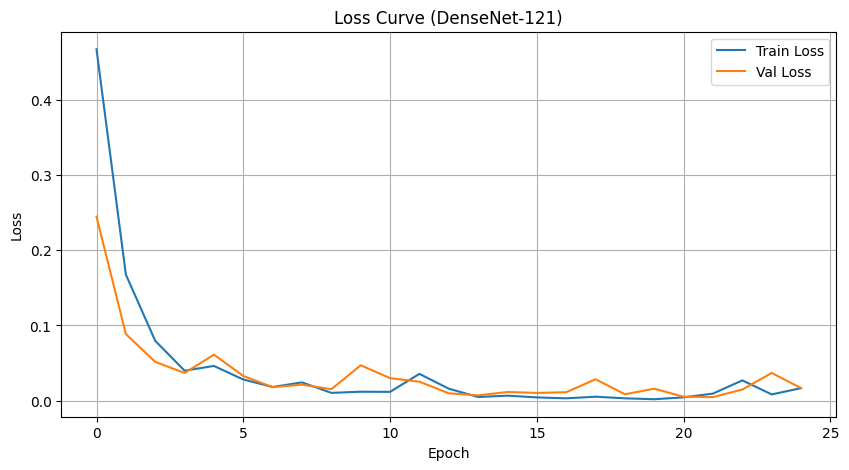

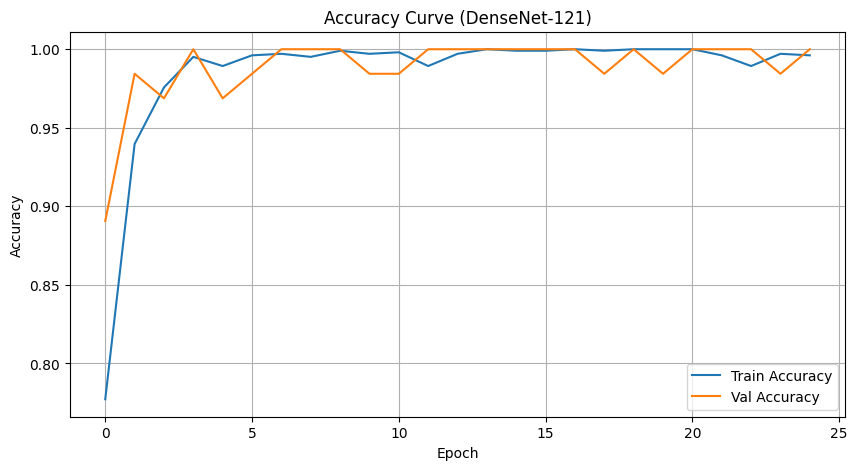


Test Accuracy: 0.9897


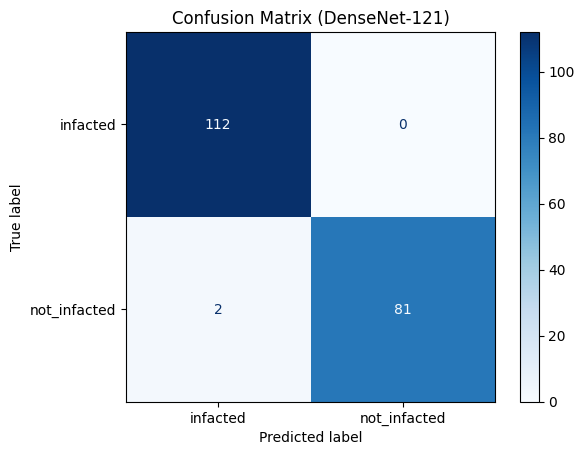

In [ ]:
# Install necessary packages
!pip install torch torchvision matplotlib scikit-learn

import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import os

# Set up paths
train_data_dir = "/content/drive/MyDrive/capstone/ArsenicSkinImageBD/Original/train"
valid_data_dir = "/content/drive/MyDrive/capstone/ArsenicSkinImageBD/Original/val"
test_data_dir  = "/content/drive/MyDrive/capstone/ArsenicSkinImageBD/Original/test"

# Check directories
for directory in [train_data_dir, valid_data_dir, test_data_dir]:
    os.makedirs(directory, exist_ok=True)

# Image transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),  # Default size for DenseNet
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# Load datasets
train_dataset = datasets.ImageFolder(root=train_data_dir, transform=transform)
valid_dataset = datasets.ImageFolder(root=valid_data_dir, transform=transform)
test_dataset  = datasets.ImageFolder(root=test_data_dir,  transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=32, shuffle=False)

# Load pre-trained DenseNet121
model = models.densenet121(pretrained=True)
num_features = model.classifier.in_features
model.classifier = nn.Linear(num_features, len(train_dataset.classes))  # Replace final layer

# Move to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training function (same style as before)
def train_model(model, criterion, optimizer, num_epochs=25):
    best_model_wts = model.state_dict()
    best_acc = 0.0

    train_losses, valid_losses = [], []
    train_accuracies, valid_accuracies = [], []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Training
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_dataset)
        epoch_acc = running_corrects.double() / len(train_dataset)
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.item())

        # Validation
        model.eval()
        valid_loss = 0.0
        valid_corrects = 0

        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                valid_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                valid_corrects += torch.sum(preds == labels.data)

        val_loss = valid_loss / len(valid_dataset)
        val_acc = valid_corrects.double() / len(valid_dataset)
        valid_losses.append(val_loss)
        valid_accuracies.append(val_acc.item())

        print(f'Train Loss: {epoch_loss:.4f} Train Acc: {epoch_acc:.4f}')
        print(f'Val   Loss: {val_loss:.4f} Val   Acc: {val_acc:.4f}')

        if val_acc > best_acc:
            best_acc = val_acc
            best_model_wts = model.state_dict()

    print(f'\n✅ Best Validation Accuracy: {best_acc:.4f}')
    model.load_state_dict(best_model_wts)
    return model, train_losses, valid_losses, train_accuracies, valid_accuracies

# Train the DenseNet-121 model
model, train_losses, valid_losses, train_accuracies, valid_accuracies = train_model(model, criterion, optimizer, num_epochs=25)

# Save the trained model
torch.save(model.state_dict(), 'densenet121_model.pth')
print("✅ DenseNet-121 model saved successfully!")

# Plot Loss Graph
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Val Loss')
plt.title('Loss Curve (DenseNet-121)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot Accuracy Graph
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(valid_accuracies, label='Val Accuracy')
plt.title('Accuracy Curve (DenseNet-121)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Evaluate model and show Confusion Matrix
def evaluate_model(model):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)
    accuracy = (all_preds == all_labels).sum() / len(all_labels)
    print(f'\nTest Accuracy: {accuracy:.4f}')

    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_dataset.classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix (DenseNet-121)")
    plt.show()

# Evaluate
evaluate_model(model)

Mobile NET V2

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 53.1MB/s]


Epoch 1/25
----------
Train Loss: 0.3795 Train Acc: 0.8200
Val   Loss: 0.1448 Val   Acc: 0.9531
Epoch 2/25
----------
Train Loss: 0.1065 Train Acc: 0.9698
Val   Loss: 0.0470 Val   Acc: 1.0000
Epoch 3/25
----------
Train Loss: 0.0829 Train Acc: 0.9669
Val   Loss: 0.0315 Val   Acc: 1.0000
Epoch 4/25
----------
Train Loss: 0.0391 Train Acc: 0.9883
Val   Loss: 0.0253 Val   Acc: 1.0000
Epoch 5/25
----------
Train Loss: 0.0276 Train Acc: 0.9903
Val   Loss: 0.0378 Val   Acc: 0.9688
Epoch 6/25
----------
Train Loss: 0.0256 Train Acc: 0.9942
Val   Loss: 0.0118 Val   Acc: 1.0000
Epoch 7/25
----------
Train Loss: 0.0302 Train Acc: 0.9922
Val   Loss: 0.0212 Val   Acc: 1.0000
Epoch 8/25
----------
Train Loss: 0.0206 Train Acc: 0.9932
Val   Loss: 0.0082 Val   Acc: 1.0000
Epoch 9/25
----------
Train Loss: 0.0281 Train Acc: 0.9903
Val   Loss: 0.0123 Val   Acc: 1.0000
Epoch 10/25
----------
Train Loss: 0.0139 Train Acc: 0.9961
Val   Loss: 0.0125 Val   Acc: 1.0000
Epoch 11/25
----------
Train Loss: 0.03

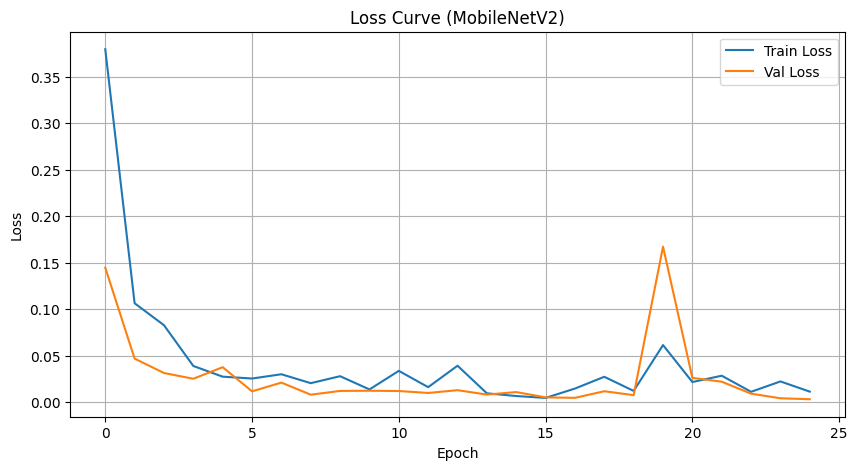

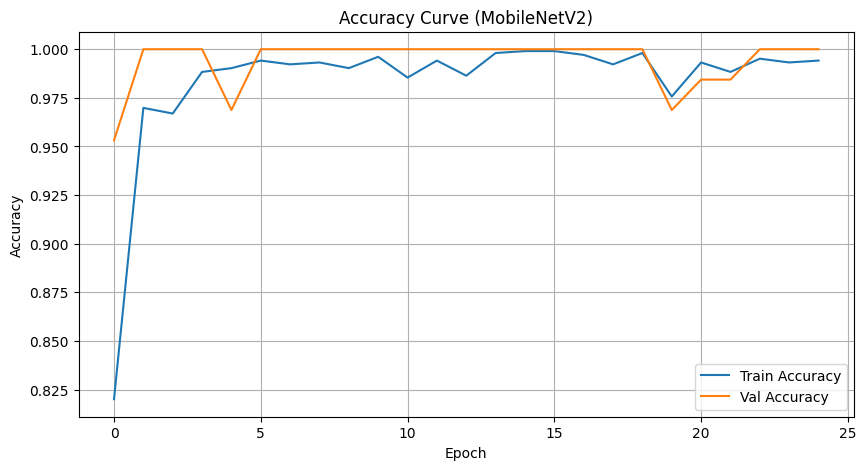


Test Accuracy: 0.9897


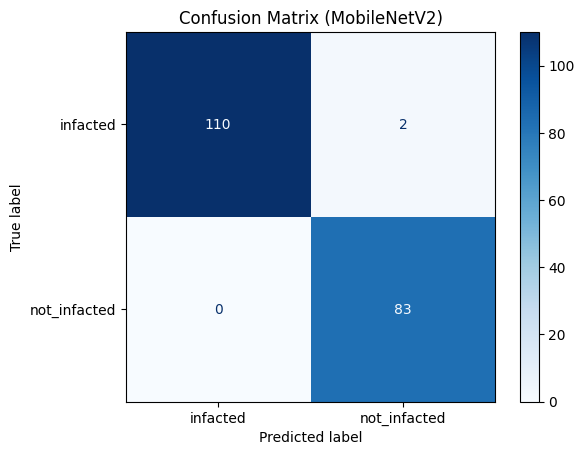

In [ ]:
# Install necessary packages
!pip install torch torchvision matplotlib scikit-learn

import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import os

# Set up paths
train_data_dir = "/content/drive/MyDrive/capstone/ArsenicSkinImageBD/Original/train"
valid_data_dir = "/content/drive/MyDrive/capstone/ArsenicSkinImageBD/Original/val"
test_data_dir  = "/content/drive/MyDrive/capstone/ArsenicSkinImageBD/Original/test"

# Check directories
for directory in [train_data_dir, valid_data_dir, test_data_dir]:
    os.makedirs(directory, exist_ok=True)

# Image transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),  # MobileNet input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# Load datasets
train_dataset = datasets.ImageFolder(root=train_data_dir, transform=transform)
valid_dataset = datasets.ImageFolder(root=valid_data_dir, transform=transform)
test_dataset  = datasets.ImageFolder(root=test_data_dir,  transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=32, shuffle=False)

# Load pre-trained MobileNetV2
model = models.mobilenet_v2(pretrained=True)
num_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_features, len(train_dataset.classes))  # Replace last layer

# Move to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training function
def train_model(model, criterion, optimizer, num_epochs=25):
    best_model_wts = model.state_dict()
    best_acc = 0.0

    train_losses, valid_losses = [], []
    train_accuracies, valid_accuracies = [], []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Training
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_dataset)
        epoch_acc = running_corrects.double() / len(train_dataset)
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.item())

        # Validation
        model.eval()
        valid_loss = 0.0
        valid_corrects = 0

        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                valid_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                valid_corrects += torch.sum(preds == labels.data)

        val_loss = valid_loss / len(valid_dataset)
        val_acc = valid_corrects.double() / len(valid_dataset)
        valid_losses.append(val_loss)
        valid_accuracies.append(val_acc.item())

        print(f'Train Loss: {epoch_loss:.4f} Train Acc: {epoch_acc:.4f}')
        print(f'Val   Loss: {val_loss:.4f} Val   Acc: {val_acc:.4f}')

        if val_acc > best_acc:
            best_acc = val_acc
            best_model_wts = model.state_dict()

    print(f'\n✅ Best Validation Accuracy: {best_acc:.4f}')
    model.load_state_dict(best_model_wts)
    return model, train_losses, valid_losses, train_accuracies, valid_accuracies

# Train the MobileNetV2 model
model, train_losses, valid_losses, train_accuracies, valid_accuracies = train_model(model, criterion, optimizer, num_epochs=25)

# Save the trained model
torch.save(model.state_dict(), 'mobilenetv2_model.pth')
print("✅ MobileNetV2 model saved successfully!")

# Plot Loss Graph
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Val Loss')
plt.title('Loss Curve (MobileNetV2)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot Accuracy Graph
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(valid_accuracies, label='Val Accuracy')
plt.title('Accuracy Curve (MobileNetV2)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Evaluate model and show Confusion Matrix
def evaluate_model(model):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)
    accuracy = (all_preds == all_labels).sum() / len(all_labels)
    print(f'\nTest Accuracy: {accuracy:.4f}')

    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_dataset.classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix (MobileNetV2)")
    plt.show()

# Evaluate
evaluate_model(model)